## Nguyễn Phạm Xuân Thắng - Assgiment #03

**Import libraries**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

**Import data**

In [0]:
file_path = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# file_path = "Online_Retail.csv"
retail_df = pd.read_csv(file_path,encoding='latin1')
# Note: set param encoding = 'latin1'
# Your code here

Get some infomation about Online Retail dataset

In [3]:
# Print out First 5 rows from dataframe
# Your code here
retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# Print out brief info
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
retail_df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/11 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [6]:
# Your code here
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [7]:
retail_df[retail_df.isna()].sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
193951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Exclude negative Quatity entries**

In [8]:
retail_df[retail_df.Quantity <= 0].sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
54342,C540942,37448,CERAMIC CAKE DESIGN SPOTTED MUG,-1,1/12/11 12:30,1.49,13113.0,United Kingdom
100714,544832,62096A,NaN,-88,2/24/11 10:05,0.00,NaN,United Kingdom
397026,571116,23131,?,-49,10/13/11 17:46,0.00,NaN,United Kingdom
343660,C566953,23433,HANGING QUILTED PATCHWORK APPLES,-11,9/15/11 16:37,0.83,15804.0,United Kingdom
222716,C556457,37449,CERAMIC CAKE STAND + HANGING CAKES,-5,6/10/11 16:50,6.75,15856.0,United Kingdom


In [0]:
retail_df = retail_df[retail_df.Quantity > 0]

**Exclude negative Price entries**

In [10]:
retail_df[retail_df.UnitPrice <= 0].sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
130953,547531,82605,NaN,1,3/23/11 15:06,0.0,NaN,United Kingdom
346849,567207,35592T,NaN,4,9/19/11 11:01,0.0,NaN,United Kingdom
130078,547402,85028L,NaN,12,3/22/11 17:04,0.0,NaN,United Kingdom
138695,548207,20713,NaN,25,3/29/11 17:11,0.0,NaN,United Kingdom
485985,577696,M,Manual,1,11/21/11 11:57,0.0,16406.0,United Kingdom


In [0]:
retail_df = retail_df[retail_df.UnitPrice > 0]

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [12]:
# Check unique in InvoiceNo?
retail_df.InvoiceNo.nunique() == len(retail_df)

False

In one invoice, the customer have order with many item

In [13]:
retail_df_invoice_with_quantity = retail_df.groupby(["InvoiceNo"]).sum().Quantity.reset_index()
retail_df_invoice_with_quantity = retail_df_invoice_with_quantity.rename(columns={"Quantity": "TotalQuantity"})
retail_df_invoice_with_quantity.head(5)

,InvoiceNo,TotalQuantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3


In [14]:
retail_df_merge_quantity = retail_df.merge(retail_df_invoice_with_quantity,left_on='InvoiceNo',right_on='InvoiceNo')
retail_df_merge_quantity.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalQuantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,40
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,40
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,40
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,40
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,40


In [15]:
print("The customer with the highest number of orders comes from the United Kingdom (UK):")
retail_df_merge_quantity = retail_df_merge_quantity.sort_values(['TotalQuantity'], ascending=False)
retail_df_merge_quantity[retail_df_merge_quantity.Country == 'United Kingdom' ].head(1)

The customer with the highest number of orders comes from the United Kingdom (UK):


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalQuantity
528623,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/11 9:15,2.08,16446.0,United Kingdom,80995


**The customer with the highest money spent on purchases comes from Netherlands**

In [16]:
retail_df['UnitTotalPrice'] = retail_df.Quantity * retail_df.UnitPrice
retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitTotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [17]:
retail_df_invoice_with_totalprice = retail_df.groupby(["InvoiceNo"]).sum().UnitTotalPrice.reset_index()
retail_df_invoice_with_totalprice = retail_df_invoice_with_totalprice.rename(columns={"UnitTotalPrice": "TotalPrice"})
retail_df_invoice_with_totalprice.head(5)

,InvoiceNo,TotalPrice
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


In [18]:
retail_df_merge_totalprice = retail_df.merge(retail_df_invoice_with_totalprice,left_on='InvoiceNo',right_on='InvoiceNo')
retail_df_merge_totalprice.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitTotalPrice,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30,139.12
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,139.12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00,139.12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,139.12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,139.12


### The customer with the highest money spent on purchases comes from Netherlands

In [19]:
retail_df_merge_totalprice_sort = retail_df_merge_totalprice.sort_values(['TotalPrice'], ascending=False).reset_index()
retail_df_merge_totalprice_sort[retail_df_merge_totalprice_sort.Country == 'Netherlands'].head(1)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitTotalPrice,TotalPrice
613,399291,572035,22947,WOODEN ADVENT CALENDAR RED,12,10/20/11 12:03,7.95,14646.0,Netherlands,95.4,20277.92


**On which year had the highest sales?**

In [20]:
retail_df_merge_totalprice.head(5)
retail_df_merge_totalprice_year = retail_df_merge_totalprice.drop_duplicates(subset='InvoiceNo').reset_index(drop = True)
retail_df_merge_totalprice_year.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitTotalPrice,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30,139.12
1,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom,11.10,22.20
2,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom,54.08,278.73
3,536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 8:34,4.25,13047.0,United Kingdom,25.50,70.05
4,536369,21756,BATH BUILDING BLOCK WORD,3,12/1/10 8:35,5.95,13047.0,United Kingdom,17.85,17.85


In [21]:
retail_df_merge_totalprice_year['InvoiceDate'] = retail_df_merge_totalprice_year['InvoiceDate'].astype('datetime64[ns]')
retail_df_merge_totalprice_year["Year"] = retail_df_merge_totalprice_year.InvoiceDate.apply(lambda x: x.year)
print("Year with highest sales:",retail_df_merge_totalprice_year.groupby(["Year"]).sum().TotalPrice.idxmax())
print("sale:",retail_df_merge_totalprice_year.groupby(["Year"]).sum().TotalPrice.max())

Year with highest sales: 2011
sale: 9842938.404000007


**How many orders (per hour)?**

In [22]:
retail_df_merge_totalprice_year["Hour"] = retail_df_merge_totalprice_year.InvoiceDate.apply(lambda x: x.hour)
retail_df_merge_totalprice_year['PerHour'] = retail_df_merge_totalprice_year['InvoiceDate'].dt.strftime('%m/%d/%Y %H')
retail_df_merge_totalprice_year
retail_df_per_hours = retail_df_merge_totalprice_year.groupby(["PerHour"]).InvoiceNo.count().reset_index()
retail_df_per_hours2 = retail_df_merge_totalprice_year.groupby(["Hour"]).InvoiceNo.count().reset_index()
retail_df_per_hours.head(5)

,PerHour,InvoiceNo
0,01/04/2011 10,6
1,01/04/2011 11,5
2,01/04/2011 12,5
3,01/04/2011 13,8
4,01/04/2011 14,6


**Make a plot about number of orders per hour**

Text(0.5, 1.0, 'Orders per hour in each days')

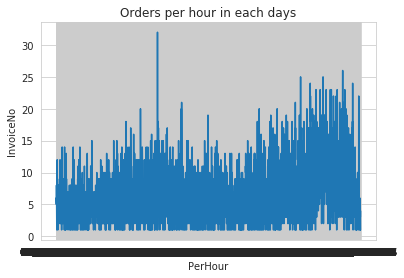

In [23]:
sns.lineplot(x="PerHour", y="InvoiceNo", data=retail_df_per_hours).set_title("Orders per hour in each days")

Text(0.5, 1.0, 'Orders per hour')

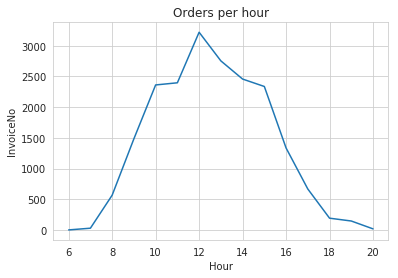

In [24]:
sns.lineplot(x="Hour", y="InvoiceNo", data=retail_df_per_hours2).set_title("Orders per hour")

**How many orders (per month)?**

In [25]:
retail_df_merge_totalprice_year["Month"] = retail_df_merge_totalprice_year.InvoiceDate.apply(lambda x: x.month)
retail_df_merge_totalprice_year['PerMonth'] = retail_df_merge_totalprice_year['InvoiceDate'].dt.strftime('%m/%Y')
retail_df_merge_totalprice_year.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitTotalPrice,TotalPrice,Year,Hour,PerHour,Month,PerMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,139.12,2010,8,12/01/2010 08,12,12/2010
1,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,22.20,2010,8,12/01/2010 08,12,12/2010
2,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,278.73,2010,8,12/01/2010 08,12,12/2010
3,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,25.50,70.05,2010,8,12/01/2010 08,12,12/2010
4,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,17.85,17.85,2010,8,12/01/2010 08,12,12/2010


**Make a plot about number of orders per month**

In [0]:
retail_df_per_month = retail_df_merge_totalprice_year.groupby(["PerMonth"]).InvoiceNo.count().reset_index()
retail_df_per_month2 = retail_df_merge_totalprice_year.groupby(["Month"]).InvoiceNo.count().reset_index()

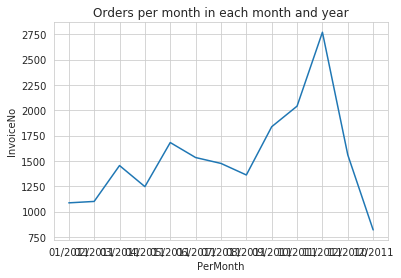

In [27]:
g = sns.lineplot(x="PerMonth", y="InvoiceNo", data=retail_df_per_month).set_title("Orders per month in each month and year")

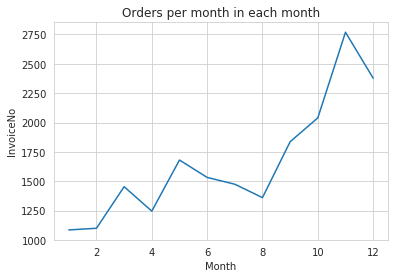

In [28]:
g = sns.lineplot(x="Month", y="InvoiceNo", data=retail_df_per_month2).set_title("Orders per month in each month")

**Top 10 items most sales**

In [29]:
retail_df.groupby(["StockCode"]).sum().sort_values(by="Quantity",ascending=False).head(10)

,Quantity,UnitPrice,CustomerID,UnitTotalPrice
StockCode,,,,
23843,80995,2.08,16446.0,168469.60
23166,78033,367.12,3047321.0,81700.92
22197,56921,1486.56,16490386.0,51354.02
84077,55047,172.20,7226036.0,13841.85
85099B,48474,5249.29,24748363.0,94340.05
85123A,37660,7059.89,31667793.0,104518.80
84879,36461,2564.49,21450268.0,59094.93
21212,36419,1039.05,16135698.0,21259.10
23084,30788,2466.20,12564016.0,66964.99


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

### You are awesome!!

In [30]:
countries_gr = retail_df[retail_df.Country != "United Kingdom"].groupby(["Country"]).sum().reset_index()
countries_gr.head()

,Country,Quantity,UnitPrice,CustomerID,UnitTotalPrice
0,Australia,83901,3612.50,14721267.0,138521.31
1,Austria,4881,1693.90,4982601.0,10198.68
2,Bahrain,314,82.76,210027.0,754.14
3,Belgium,23237,7372.85,25246701.0,41196.34
4,Brazil,356,142.60,408608.0,1143.60


[Text(0, 0, 'Netherlands'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Belgium')]

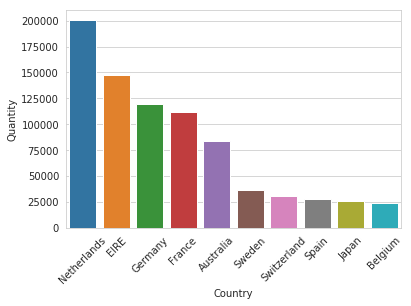

In [31]:
g = sns.barplot(x="Country", y="Quantity", data=countries_gr.sort_values(by="Quantity",ascending=False).head(10))
g.set_xticklabels(labels=countries_gr.sort_values(by="Quantity",ascending=False).head(10).Country,rotation=45)